# Task 4.9 - Part 2:

# 1. Importing Libraries &Dataframe

In [1]:
#Import all libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r'C:\Users\Ryan Pares\Instacart Basket Analysis'

In [3]:
# importing dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

# 2. Using sample subset to create visulizations

In [13]:
# Create Subset
df_1 = df[:1000000]

In [14]:
# Use a 70/30 Split
np.random.seed(4)
dev = np.random.rand(len(df_1)) <= 0.7

In [15]:
np.random.rand(10)

array([0.14558531, 0.30956713, 0.87468615, 0.50287514, 0.38487566,
       0.60254022, 0.32412759, 0.65601576, 0.62784649, 0.42485982])

In [16]:
# Store 70% of df_1 into 
big = df_1[dev]
small = df_1[~dev]

In [19]:
# Check lenghts
len(df_1)

1000000

In [18]:
len(big)+len(small)

1000000

In [40]:
# Creating dataframe with 30% data & only with required columns 
df_2 = small[['order_dow','prices', 'order_hour_of_day', 'Age','Number of Dependents', 'Income']]

In [41]:
df_2.head()

,order_dow,prices,order_hour_of_day,Age,Number of Dependents,Income
0,2,9.0,8,31,3,40423
2,3,9.0,12,31,3,40423
3,4,9.0,7,31,3,40423
6,1,9.0,9,31,3,40423
10,2,12.5,8,31,3,40423


# 3. Histogram of the “order_hour_of_day” column.

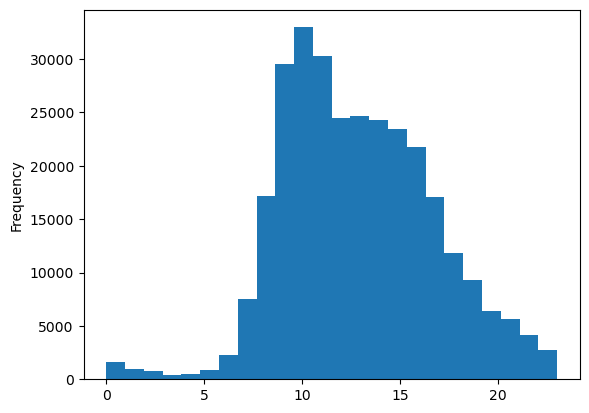

In [42]:
#creating histogram for the subset 'order_hour_of_day'
hist1 = df_2['order_hour_of_day'].plot.hist(bins = 24)

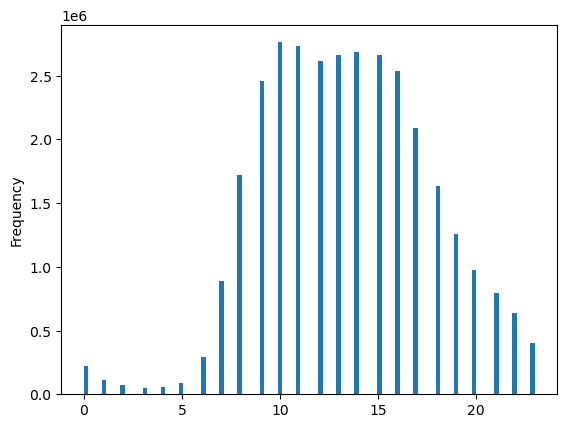

In [43]:
#creating histogram for the full dataset 'order_hour_of_day'
hist2 = df['order_hour_of_day'].plot.hist(bins = 100)

#### From the Histogram based on the entire dataset, the busiest hours of the day is from 9:00 to 16:00

# 4. Create a bar chart from the “loyalty_flag” column.

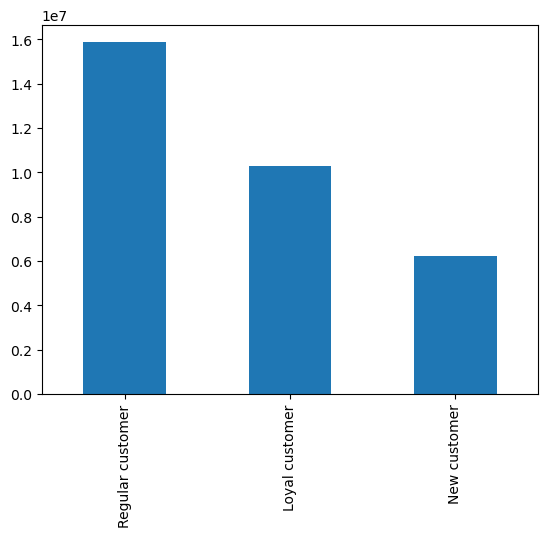

In [44]:
#creating a bar chart for "loyalty_flag"
bar = df['loyalty_flag'].value_counts().plot.bar()

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [45]:
#group by hour of the day and calculate the mean expenditure
hourly_expenditure = df_2.groupby('order_hour_of_day')['prices'].mean().reset_index()

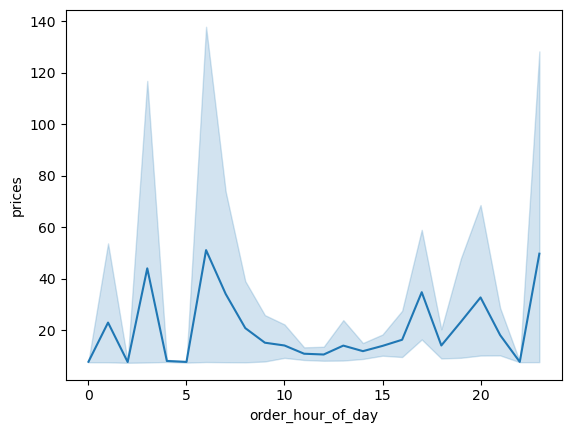

In [46]:
# Create a line chart
line_price_hod = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

#### Expenditure is low between 7:00 & 15:00

# 6. Create a line chart exploring the connections between age and number of dependents

In [47]:
# Check columns of sampled data
df_2.columns

Index(['order_dow', 'prices', 'order_hour_of_day', 'Age',
       'Number of Dependents', 'Income'],
      dtype='object')

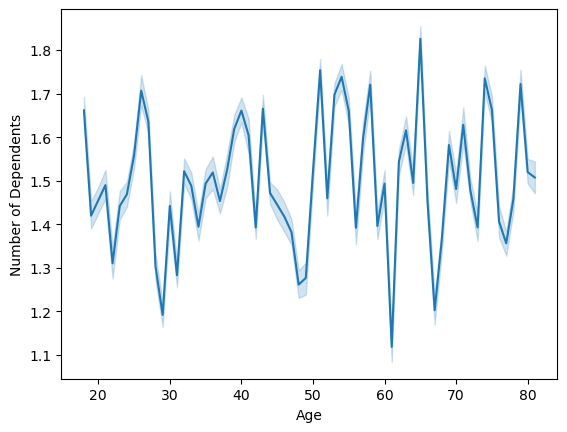

In [49]:
#Create a line chart
line_age_nod = sns.lineplot(data = df_2, x = 'Age', y = 'Number of Dependents')

#### Seems to be no co-relation between Age & Number of Dependents

# 7. Create a Scatterplot to explore a connection between age and spending power (income)

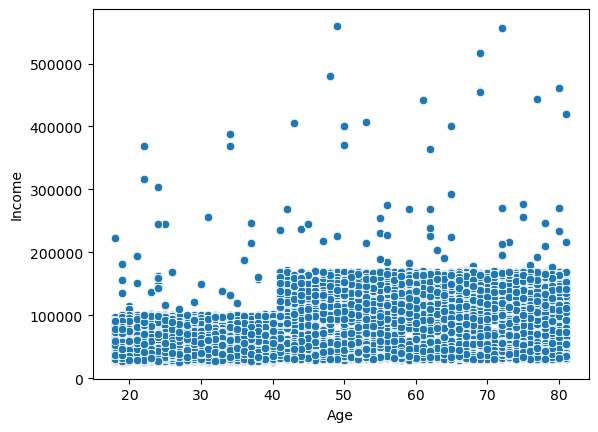

In [50]:
#creating a scatterplot of 'Age' and 'Income'
scatter = sns.scatterplot(x='Age', y='Income', data=df_2)

#### Noticable increase in income from Ages above 40

# 8. Export visualizations as “.png” files

In [51]:
#exporting and saving images
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist1_order_hour_of_day.png'))

In [52]:
#exporting and saving image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [53]:
#exporting and saving image
line_price_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hour_of_day.png'))

In [54]:
#exporting and saving image
line_age_nod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_number_of_dependents.png'))

In [55]:
#exporting and saving images
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist2_order_hour_of_day.png'))